In [88]:
### IMPORTS AND READ CSV
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Initialise dataframe with headers
col_names = ["elevation", "aspect", "slope", "horizontaltohydro", "verticaltohydro", "horizontaltoroadway", "hillshade9am", "hillshadenoon", "hillshade3pm", "horizontaltofirepoints", "wildernessareaRawah", "wildernessareaNeota", "wildernessareaComanche", "wildernessareaCache", "soil1", "soi2", "soil3", "soil4", "soil5", "soil6", "soil7", "soil8", "soil9", "soil10", "soil11", "soil12", "soil13", "soil14", "soil15", "soil16", "soil17", "soil18", "soil19", "soil20", "soil21", "soil22", "soil23", "soil24", "soil25", "soil26", "soil27", "soil28", "soil29", "soil30", "soil31", "soil32", "soil33", "soil34", "soil35", "soil36", "soil37", "soil38", "soil39", "soil40", "target"]
cover_data = pd.read_csv('covtype.data', sep=',', names=col_names)
# Output dataframe contains 8124 entries

In [89]:
### DATA CLEANING
# Remove rows with ANY null values
X1 = cover_data.dropna()
# Output dataframe contains 581012 entries
X1

,elevation,aspect,slope,horizontaltohydro,verticaltohydro,horizontaltoroadway,hillshade9am,hillshadenoon,hillshade3pm,horizontaltofirepoints,...,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40,target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [90]:
### Cleaned training and target data, ready to encode, split, and train

# Training data without the target column
X = X1.drop(columns=["target"])

# Initialise target column  in new dataframe
Y = X1["target"]

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier

In [33]:
# split data for no cross validation training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
%%time
# SGD Linear Support Vector Classifier - No Cross Validation -  max_iter = 1000
clfSGD = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

clfSGD.fit(X_train, Y_train)

predict = clfSGD.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
svc_NoCV_1k = accuracy
svc_NoCV_1k

CPU times: total: 9 s
Wall time: 8.88 s


0.7121502887188799

In [7]:
%%time
# SGD Logistic Regression Classifier - No Cross Validation - max_iter = 1000
clfSGDLR = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss'))
clfSGDLR.fit(X_train, Y_train)

predict = clfSGDLR.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
lr_NoCV_1k = accuracy
lr_NoCV_1k

CPU times: total: 12.2 s
Wall time: 10.8 s


0.7113241482577902

In [8]:
%%time
### 10-fold Cross-validation loss hinge (linear SVC) - max_iter = 1000
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD.fit(X_train, Y_train)
    predict = clfSGD.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
svc_10fold_1k = average_accuracy_10
print("avg:" + str(svc_10fold_1k))


0.6759319816873773
0.8422257409383498
0.7288514827627751
0.6937057881964166
0.5804547253919898
0.6488700710831139
0.6739470921326656
0.7264246742741088
0.5635014887867679
0.5842412350906181
avg:0.6718154280344184
CPU times: total: 2min 6s
Wall time: 1min 53s


In [43]:
%%time
### 5-fold Cross-validation loss hinge (linear SVC) - max iter = 1000
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD.fit(X_train, Y_train)
    predict = clfSGD.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
svc_5fold_1k = average_accuracy_5
print("avg:" + str(svc_5fold_1k))

0.7535691849608014
0.6955672400884658
0.5770554723670849
0.6870880019276777
0.592485499388995
avg:0.6611530797466049
CPU times: total: 56.5 s
Wall time: 51.1 s


In [10]:
%%time
### 10-fold Cross-validation logistic regression - max iter = 1000
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR.fit(X_train, Y_train)
    predict = clfSGDLR.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
lr_10fold_1k = average_accuracy_10
print("avg:" + str(lr_10fold_1k))

0.6839695707548793
0.8361674296926096
0.7102975852394967
0.7107450818402438
0.5442419235469269
0.6203163456739127
0.6965284590626667
0.7455121254367395
0.5825889399493984
0.6200753859658181
avg:0.6750442847162692
CPU times: total: 2min 10s
Wall time: 1min 56s


In [11]:
%%time
### 5-fold Cross-validation logistic regression - max iter = 1000
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR.fit(X_train, Y_train)
    predict = clfSGDLR.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
lr_5fold_1k = average_accuracy_5
print("avg:" + str(lr_5fold_1k))

0.757932239270931
0.7125805702090308
0.5850415655496463
0.6781897041359013
0.5790778127743068
avg:0.6625643783879632
CPU times: total: 1min
Wall time: 53.2 s


In [12]:
# split data for no cross validation training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
%%time
# SGD Linear Support Vector Classifier - No Cross Validation - max_iter = 500
clfSGD500 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge',max_iter=500))

clfSGD500.fit(X_train, Y_train)

predict = clfSGD500.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
svc_NoCV_500 = accuracy
svc_NoCV_500

CPU times: total: 11.4 s
Wall time: 11.2 s


0.7135530063767717

In [14]:
%%time
# SGD Logistic Regression Classifier - No Cross Validation - max_iter = 500
clfSGDLR500 = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss',max_iter=500))

clfSGDLR500.fit(X_train, Y_train)

predict = clfSGDLR500.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
lr_NoCV_500 = accuracy
lr_NoCV_500

CPU times: total: 11.8 s
Wall time: 10.6 s
Compiler : 125 ms


0.713742330232438

In [15]:
%%time
### 10-fold Cross-validation loss hinge (linear SVC) - max_iter = 500
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD500.fit(X_train, Y_train)
    predict = clfSGD500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
svc_10fold_500 = average_accuracy_10
print("avg:" + str(svc_10fold_500))

0.6744862483219166
0.8421224742693884
0.7245830536479578
0.6935853083423693
0.6329323075334332
0.614498889864202
0.6945491471747475
0.7179910844908005
0.5514707147897626
0.5811431817008313
avg:0.6727362410135409
CPU times: total: 2min 5s
Wall time: 1min 51s


In [16]:
%%time
### 5-fold Cross-validation loss hinge (linear SVC)- max_iter = 500
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD500.fit(X_train, Y_train)
    predict = clfSGD500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
svc_5fold_500 = average_accuracy_5
print("avg:" + str(svc_5fold_500))

0.7426142182215606
0.7106356978735489
0.5655238291939898
0.6964940362472246
0.5882773102012013
avg:0.6607090183475051
CPU times: total: 56.9 s
Wall time: 50 s


In [17]:
%%time
### 10-fold Cross-validation logistic regression - max_iter = 500
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR500.fit(X_train, Y_train)
    predict = clfSGDLR500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
lr_10fold_500 = average_accuracy_10
print("avg:" + str(lr_10fold_500))

0.709941137998692
0.8292313517606967
0.7264246742741088
0.7042735925371336
0.5702139377979725
0.6398512934372902
0.6855992151598079
0.7165281148345123
0.5715736390079345
0.6217965267379219
avg:0.6775433483546071
CPU times: total: 2min 9s
Wall time: 1min 55s


In [18]:
%%time
### 5-fold Cross-validation logistic regression - max_iter = 500
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR500.fit(X_train, Y_train)
    predict = clfSGDLR500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
lr_5fold_500 = average_accuracy_5
print("avg:" + str(lr_5fold_500))

0.7350326583651025
0.7084068397545674
0.598922565876663
0.6897127416051358
0.5961601349374366
avg:0.6656469881077811
CPU times: total: 58.9 s
Wall time: 52.1 s


In [19]:
print("LR No CV 1000: " + str(lr_NoCV_1k))
print("LR No CV 500: " + str(lr_NoCV_500))
print("LR 5Fold 1000: " + str(lr_5fold_1k))
print("LR 5Fold 500: " + str(lr_5fold_500))
print("LR 10fold 1000: " + str(lr_10fold_1k))
print("LR 10fold 500: " + str(lr_10fold_500))

print("SVC No CV 1000: " + str(svc_NoCV_1k))
print("SVC No CV 500: " + str(svc_NoCV_500))
print("SVC 5fold 1000: " + str(svc_5fold_1k))
print("SVC 5fold 500: " + str(svc_5fold_500))
print("SVC 10fold 1000: " + str(svc_10fold_1k))
print("SVC 10fold 500: " + str(svc_10fold_500))


LR No CV 1000: 0.7113241482577902
LR No CV 500: 0.713742330232438
LR 5Fold 1000: 0.6625643783879632
LR 5Fold 500: 0.6656469881077811
LR 10fold 1000: 0.6750442847162692
LR 10fold 500: 0.6775433483546071
SVC No CV 1000: 0.7165219486588126
SVC No CV 500: 0.7135530063767717
SVC 5fold 1000: 0.6656073776976541
SVC 5fold 500: 0.6607090183475051
SVC 10fold 1000: 0.6718154280344184
SVC 10fold 500: 0.6727362410135409


In [ ]:
### GridSearchCV Hyperparameter Search

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=999)

In [94]:
### 
clfNoParams = SGDClassifier(random_state = 999)

In [95]:
### Search Space
search_space = {
    "loss" : ["hinge", "log_loss"],
    "penalty" : ["l2", "l1", "elasticnet"],
}


In [96]:
from sklearn.model_selection import GridSearchCV

### Create a GridSearchCV with 10-fold cross-validation, score by accuracy
GS = GridSearchCV(estimator = clfNoParams,
                  param_grid = search_space,
                  scoring = ["accuracy"],
                  refit = "accuracy",
                  cv = 10,
                  verbose = 4
)

In [97]:
GS.fit(X_train,Y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .loss=hinge, penalty=l2; accuracy: (test=0.710) total time=   9.7s
[CV 2/10] END .loss=hinge, penalty=l2; accuracy: (test=0.716) total time=   8.5s
[CV 3/10] END .loss=hinge, penalty=l2; accuracy: (test=0.712) total time=   8.0s
[CV 4/10] END .loss=hinge, penalty=l2; accuracy: (test=0.716) total time=   8.0s
[CV 5/10] END .loss=hinge, penalty=l2; accuracy: (test=0.708) total time=   8.2s
[CV 6/10] END .loss=hinge, penalty=l2; accuracy: (test=0.713) total time=   8.3s
[CV 7/10] END .loss=hinge, penalty=l2; accuracy: (test=0.715) total time=   8.1s
[CV 8/10] END .loss=hinge, penalty=l2; accuracy: (test=0.711) total time=   8.9s
[CV 9/10] END .loss=hinge, penalty=l2; accuracy: (test=0.709) total time=   8.2s
[CV 10/10] END loss=hinge, penalty=l2; accuracy: (test=0.708) total time=   8.4s
[CV 1/10] END .loss=hinge, penalty=l1; accuracy: (test=0.712) total time=  21.2s
[CV 2/10] END .loss=hinge, penalty=l1; accuracy:

GridSearchCV(cv=10, estimator=SGDClassifier(random_state=999),
             param_grid={'loss': ['hinge', 'log_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='accuracy', scoring=['accuracy'], verbose=4)

In [98]:
GS.best_params_

{'loss': 'log_loss', 'penalty': 'elasticnet'}

In [99]:
GS.best_score_

0.7146569859518414

In [101]:
GS.cv_results_

{'mean_fit_time': array([ 8.51451635, 21.22952065, 12.23272917,  8.58736007, 22.50823865,
        11.36811037]),
 'std_fit_time': array([0.48773639, 2.09518468, 0.31744035, 0.28340502, 3.46417552,
        0.30816094]),
 'mean_score_time': array([0.00926414, 0.00909824, 0.00939925, 0.00939932, 0.00920906,
        0.00961716]),
 'std_score_time': array([0.00049167, 0.00053786, 0.00066527, 0.00048842, 0.00043757,
        0.00050641]),
 'param_loss': masked_array(data=['hinge', 'hinge', 'hinge', 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l1', 'elasticnet', 'l2', 'l1', 'elasticnet'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'loss': 'hinge', 'penalty': 'l2'},
  {'loss': 'hinge', 'penalty': 'l1'},
  {'loss': 'hinge', 'penalty': 'elasticn

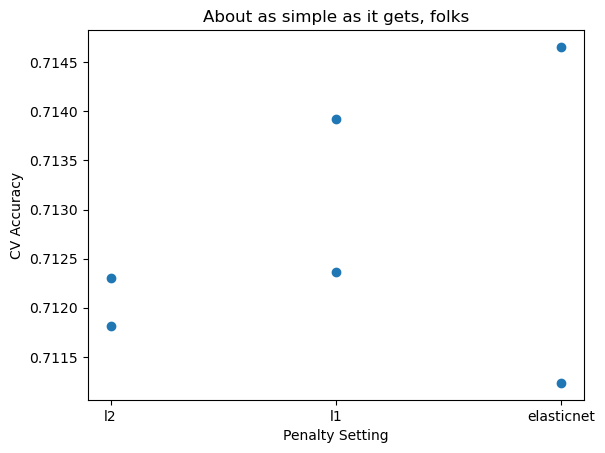

In [102]:
l = GS.cv_results_["param_loss"]
p = GS.cv_results_["param_penalty"]
a = GS.cv_results_["mean_test_accuracy"]

fig, ax = plt.subplots()
ax.scatter(p, a)

ax.set(xlabel='Penalty Setting', ylabel='CV Accuracy',
       title='About as simple as it gets, folks')
plt.show()

<AxesSubplot:xlabel='param_penalty', ylabel='mean_test_accuracy'>

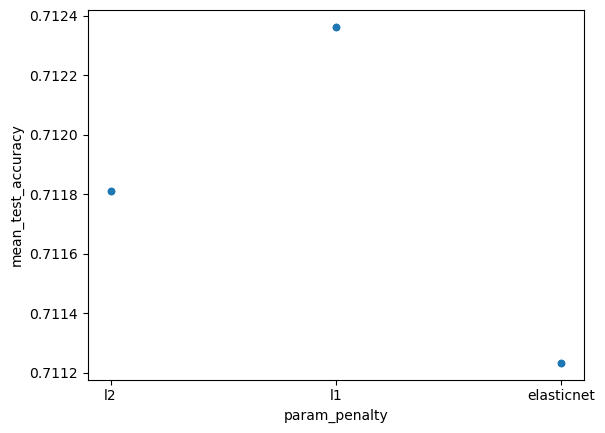

In [83]:
dfhinge.plot.scatter(x = "param_penalty", y="mean_test_accuracy")

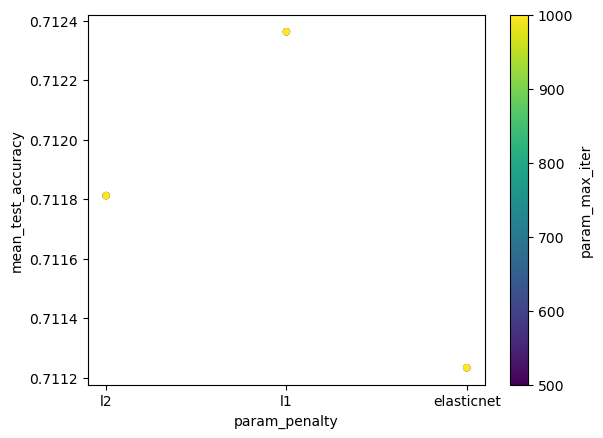

In [53]:
#ax1 = df.plot.scatter(x="param_loss",y="mean_test_accuracy",c="param_penalty")

ax2 = dfhinge.plot.scatter(x="param_penalty",y="mean_test_accuracy",c="param_max_iter",colormap='viridis')

In [56]:
clfBest = SGDClassifier(loss="log_loss",max_iter=500,penalty="elasticnet")

In [57]:
%%time
clfBest.fit(X_train, Y_train)

predict = clfBest.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
accuracy

CPU times: total: 13.5 s
Wall time: 13.5 s


0.7137853583814532

In [58]:
from sklearn.metrics import confusion_matrix

final_matrix = confusion_matrix(Y_test, predict)

[Text(0.5, 23.52222222222222, 'Predicted Values'),
 Text(50.72222222222221, 0.5, 'Actual Values')]

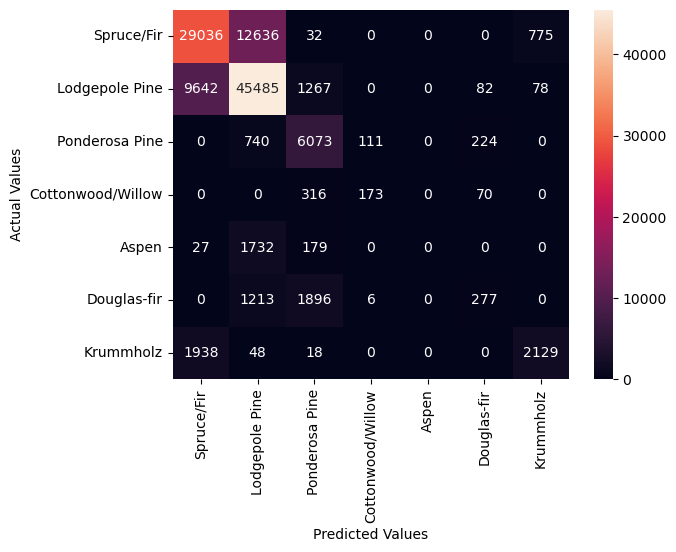

In [65]:
import seaborn as sn
labels = ["Spruce/Fir","Lodgepole Pine","Ponderosa Pine","Cottonwood/Willow","Aspen","Douglas-fir","Krummholz"]
cf_matrix = sn.heatmap(final_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
cf_matrix.set(xlabel='Predicted Values', ylabel='Actual Values')

[Text(0.5, 23.52222222222222, 'Predicted Values'),
 Text(50.722222222222214, 0.5, 'Actual Values')]

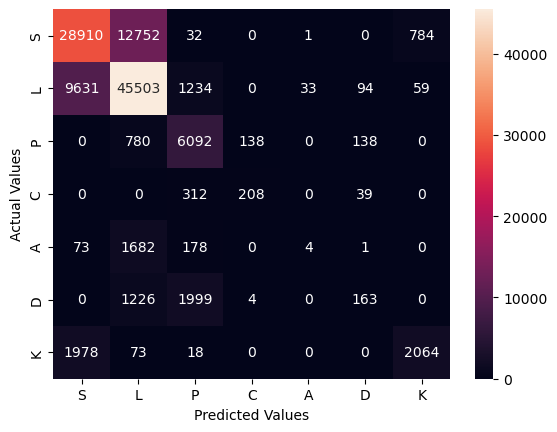

In [59]:
import seaborn as sn
labels = ["S","L","P","C","A","D","K"]
cf_matrix = sn.heatmap(final_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
cf_matrix.set(xlabel='Predicted Values', ylabel='Actual Values')

In [60]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict, zero_division=1))

              precision    recall  f1-score   support

           1       0.71      0.68      0.70     42479
           2       0.73      0.80      0.77     56554
           3       0.62      0.85      0.72      7148
           4       0.59      0.37      0.46       559
           5       0.11      0.00      0.00      1938
           6       0.37      0.05      0.09      3392
           7       0.71      0.50      0.59      4133

    accuracy                           0.71    116203
   macro avg       0.55      0.47      0.47    116203
weighted avg       0.70      0.71      0.70    116203



In [ ]:
conf_matrix_mean